<a href="https://colab.research.google.com/github/HassanRiaz1992/MCS-Project/blob/main/Gala_Groceries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Essential liabraries like Pandas and Seaborn are installed data exploration and visualization





Import Liabraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

Loading Data Set

In [ ]:
df = pd.read_csv('/content/sample_sales_data.csv')

Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   object 
 2   timestamp       7829 non-null   object 
 3   product_id      7829 non-null   object 
 4   category        7829 non-null   object 
 5   customer_type   7829 non-null   object 
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 611.8+ KB


In [ ]:
df.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


float and int data type shows quantitative data and data type object shows that it is categorical or qualitative data

In [ ]:
df1=df.drop(['Unnamed: 0'], axis=1)

Droping column Unmaned: 0 because the column shows serail values

Function for Idientifying unique values

In [ ]:
def unique_values(data, column):
  num_unique_values = len(data[column].unique())
  value_counts = data[column].value_counts()
  print(f"Column: {column} has {num_unique_values} unique values\n")
  print(value_counts)

Though we can use df.['product_id','category','customer_type','payment_type'].unique() gives similar output but defining function gives more flexibility

In [ ]:
df1.dtypes

transaction_id     object
timestamp          object
product_id         object
category           object
customer_type      object
unit_price        float64
quantity            int64
total             float64
payment_type       object
dtype: object

In [ ]:
unique_values(df1,'payment_type')

Column: payment_type has 4 unique values

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64


payment_type contains 4 category and it shows that more than 2000 entries belongs to cash based transections while debit card shows least transections

In [ ]:
unique_values(df1,'customer_type')

Column: customer_type has 5 unique values

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64


customer_type contains 5 category and it shows that large number of customers are non-members custmers with gold membership are in less number

In [ ]:
unique_values(df1,'category')

Column: category has 22 unique values

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64


categoris shows 22 categories of products and fruits and vegitables are frequent used categories

In [ ]:
unique_values(df1,'timestamp')

Column: timestamp has 7738 unique values

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64


There are 3759 unique values for timestamp

In [ ]:
df2 = df1.copy()
df2['timestamp'] = pd.to_datetime(df2['timestamp'], format='%Y-%m-%d %H:%M:%S')
df2['hour'] = df2['timestamp'].dt.hour
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  7829 non-null   object        
 1   timestamp       7829 non-null   datetime64[ns]
 2   product_id      7829 non-null   object        
 3   category        7829 non-null   object        
 4   customer_type   7829 non-null   object        
 5   unit_price      7829 non-null   float64       
 6   quantity        7829 non-null   int64         
 7   total           7829 non-null   float64       
 8   payment_type    7829 non-null   object        
 9   hour            7829 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 611.8+ KB


timestamp data is converted to datetime datatype abd then new column is extracted from timestamp which shows the number of hours for transections

In [ ]:
unique_values(df2,'hour')

Column: hour has 11 unique values

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64


hour column has 11 unique values and 11th, 16th, 18th,10th,12th and 9th hour showes the busiest day for transections; so lunch hours are busiest hours

In [ ]:
unique_values(df2,'product_id')

Column: product_id has 300 unique values

ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Name: product_id, Length: 300, dtype: int64


There are 300 numbers of products in different categories

In [ ]:
df2.describe()

,unit_price,quantity,total,hour
count,7829.000000,7829.000000,7829.000000,7829.000000
mean,7.819480,2.501597,19.709905,13.980585
std,5.388088,1.122722,17.446680,3.176205
min,0.190000,1.000000,0.190000,9.000000
25%,3.990000,1.000000,6.570000,11.000000
50%,7.190000,3.000000,14.970000,14.000000
75%,11.190000,4.000000,28.470000,17.000000
max,23.990000,4.000000,95.960000,19.000000


The dataset of 7829 transections are availiable in which mean value of unit price is 7.8 and average quantity is for sales per transection is 2.5 units while average transection is of 19.7. On the other hand minimum unit price us .19 and max unit price shows 23.99. Minimum quantity is 1 while maximum qunatity is 4 unit  used. furhter, minimum order of 17.44 is minimum value of order while maximum order is of 95.96 

In [ ]:
def continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 10):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}')

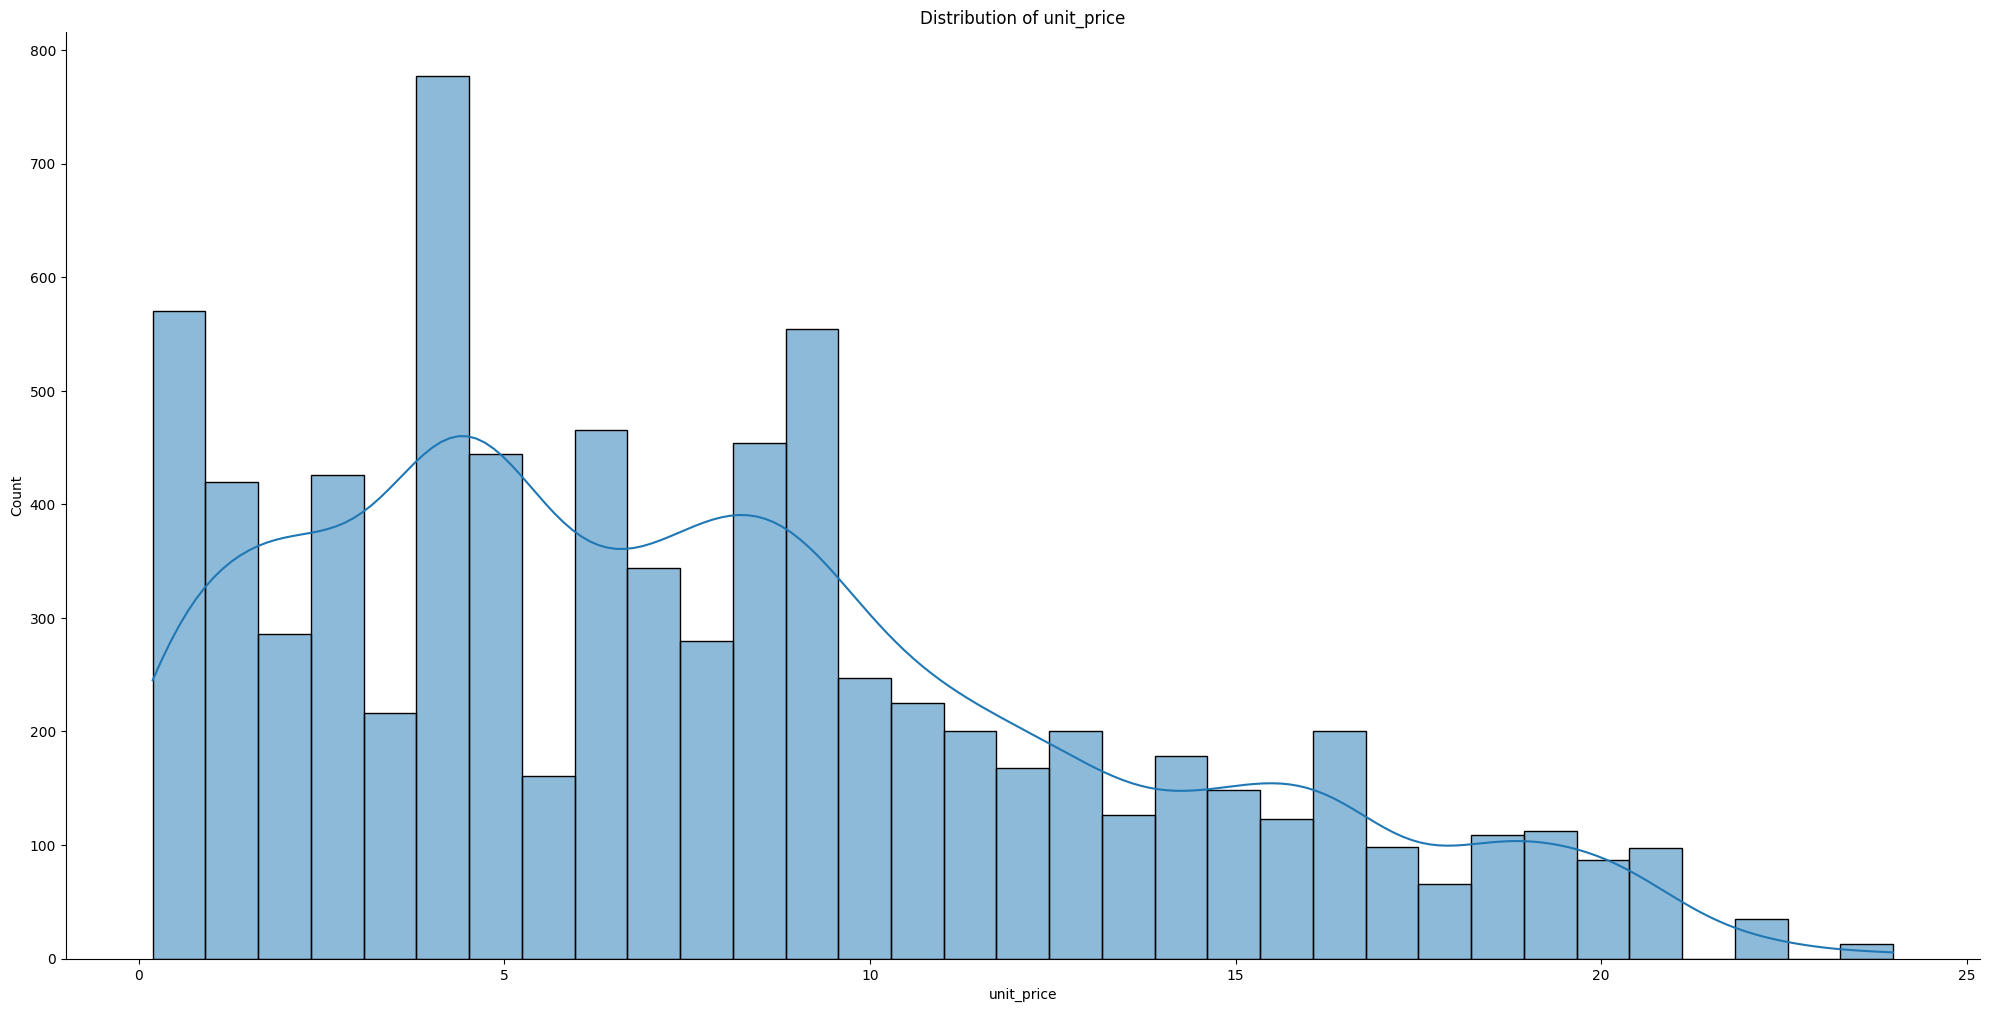

In [ ]:
continuous_distribution(df2,'unit_price')

Goods with unit price are less than 5 but greater than 3 have large sales volume.Further, good's unit value more the 10 have less sales 

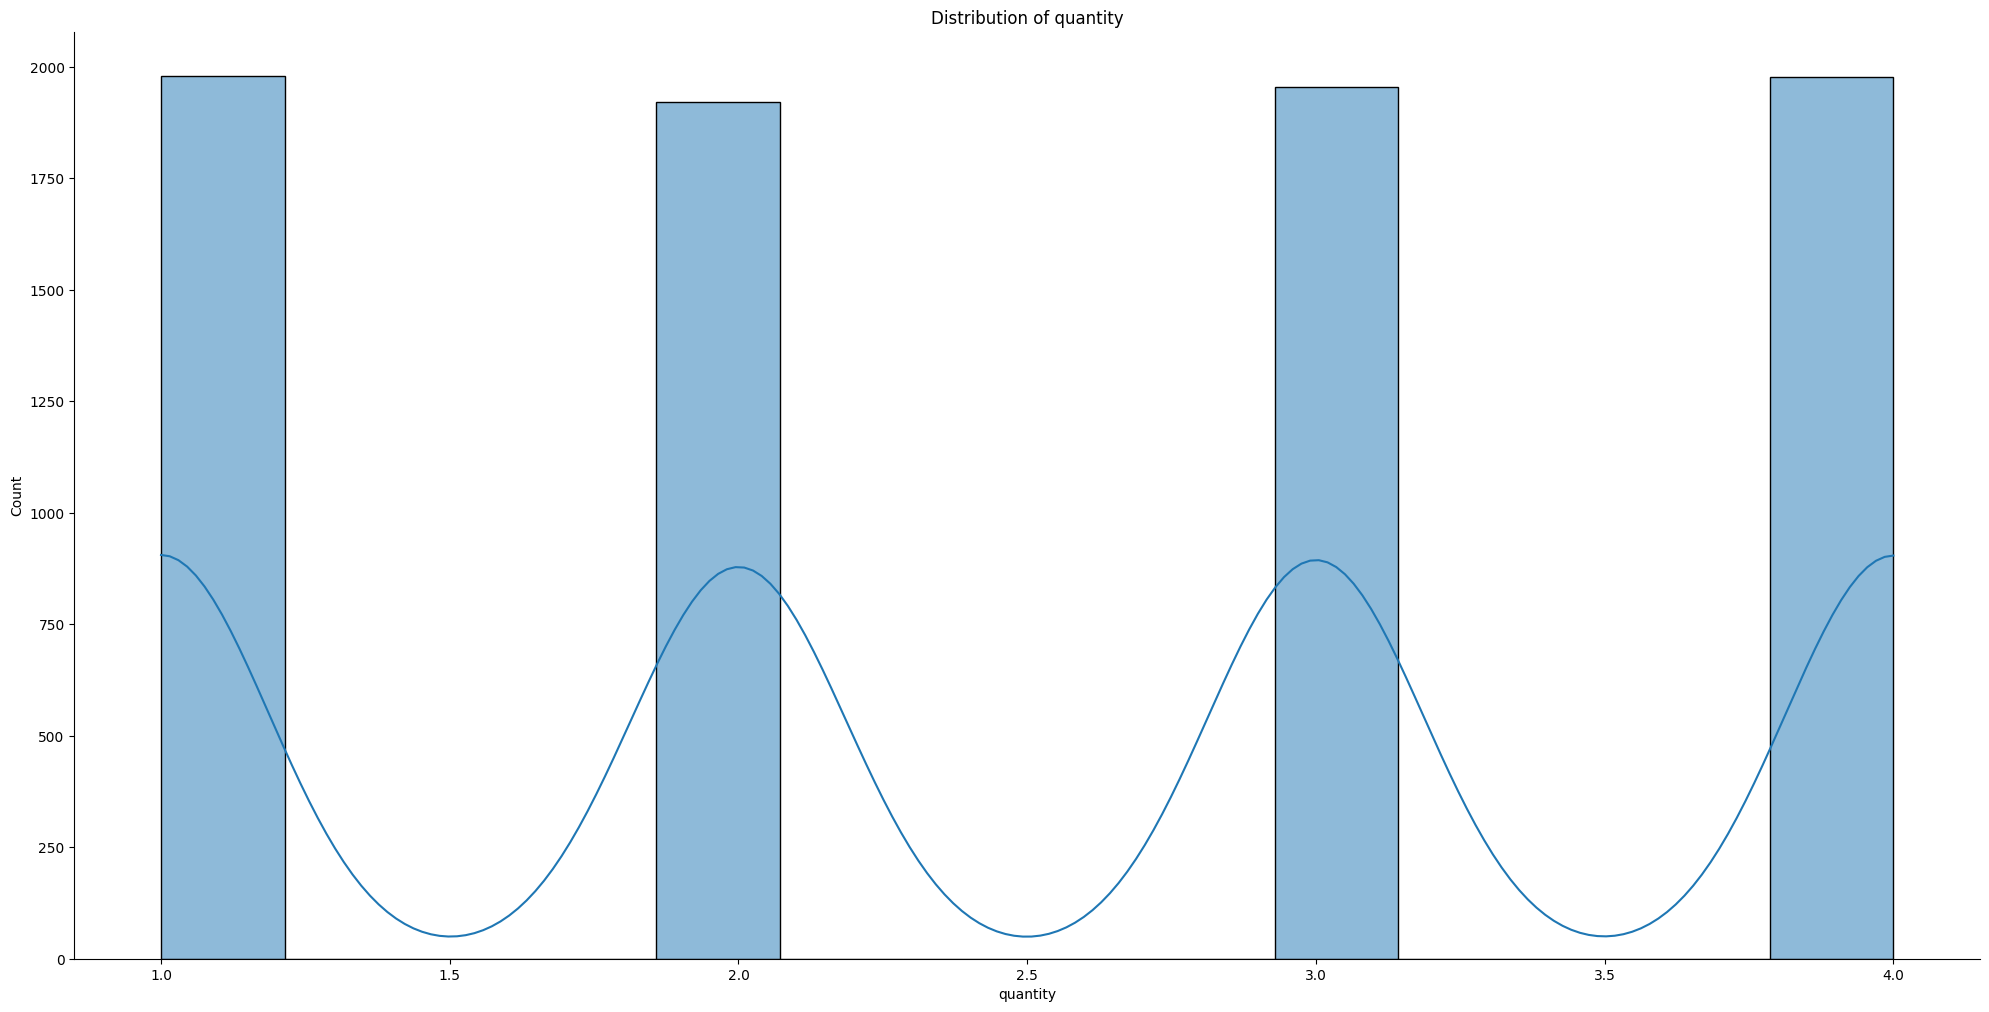

In [ ]:
continuous_distribution(df2,'quantity')

The Data of Quantity shows that goods are equally distributed in number of quantities. Further, Quantities are increasing in integer values 

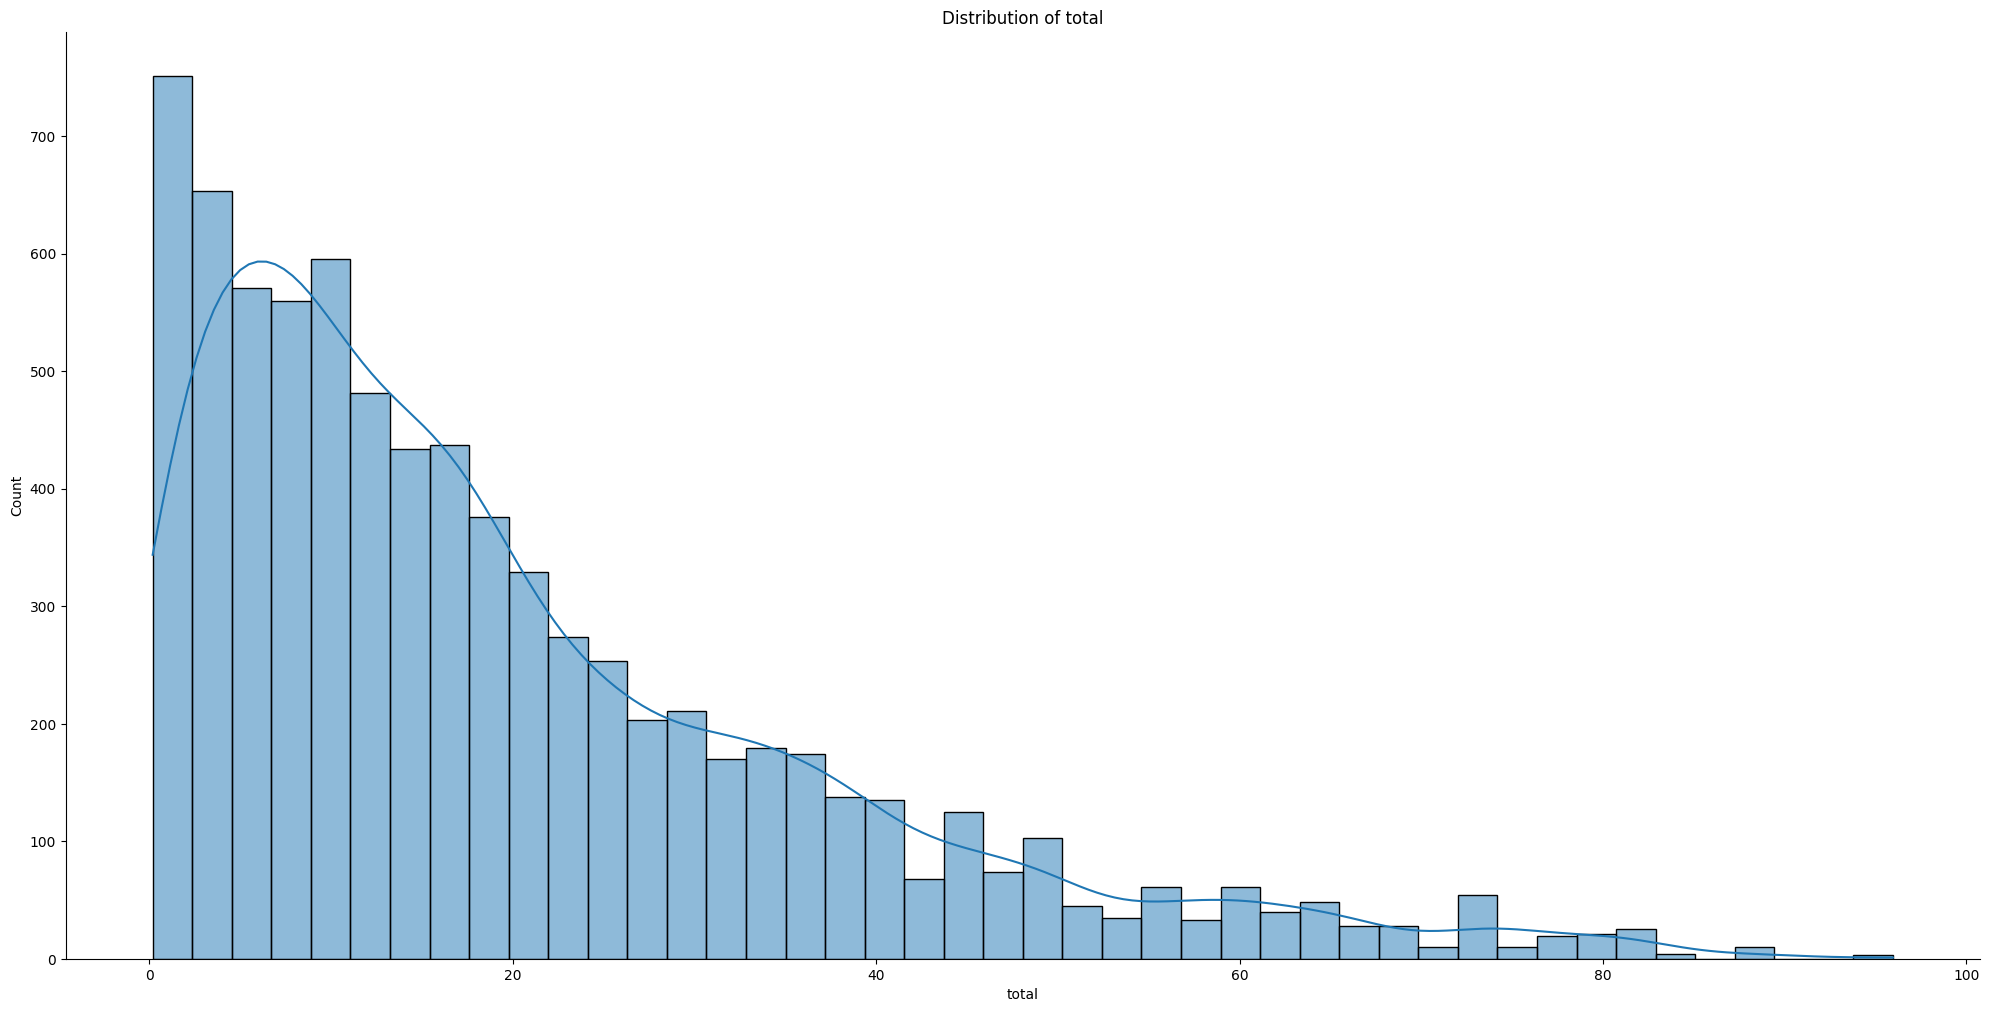

In [ ]:
continuous_distribution(df2,'total')

The chart shows that when price is less than 20 than sales volumes are greater in counts.

In [ ]:
def categorical_distribution(data: pd.DataFrame = None, column: str = None, height: int = 10, aspect: int = 3):
  _ = sns.catplot(data=data, x=column, kind='count', height=height, aspect=aspect).set(title=f'Distribution of {column}')

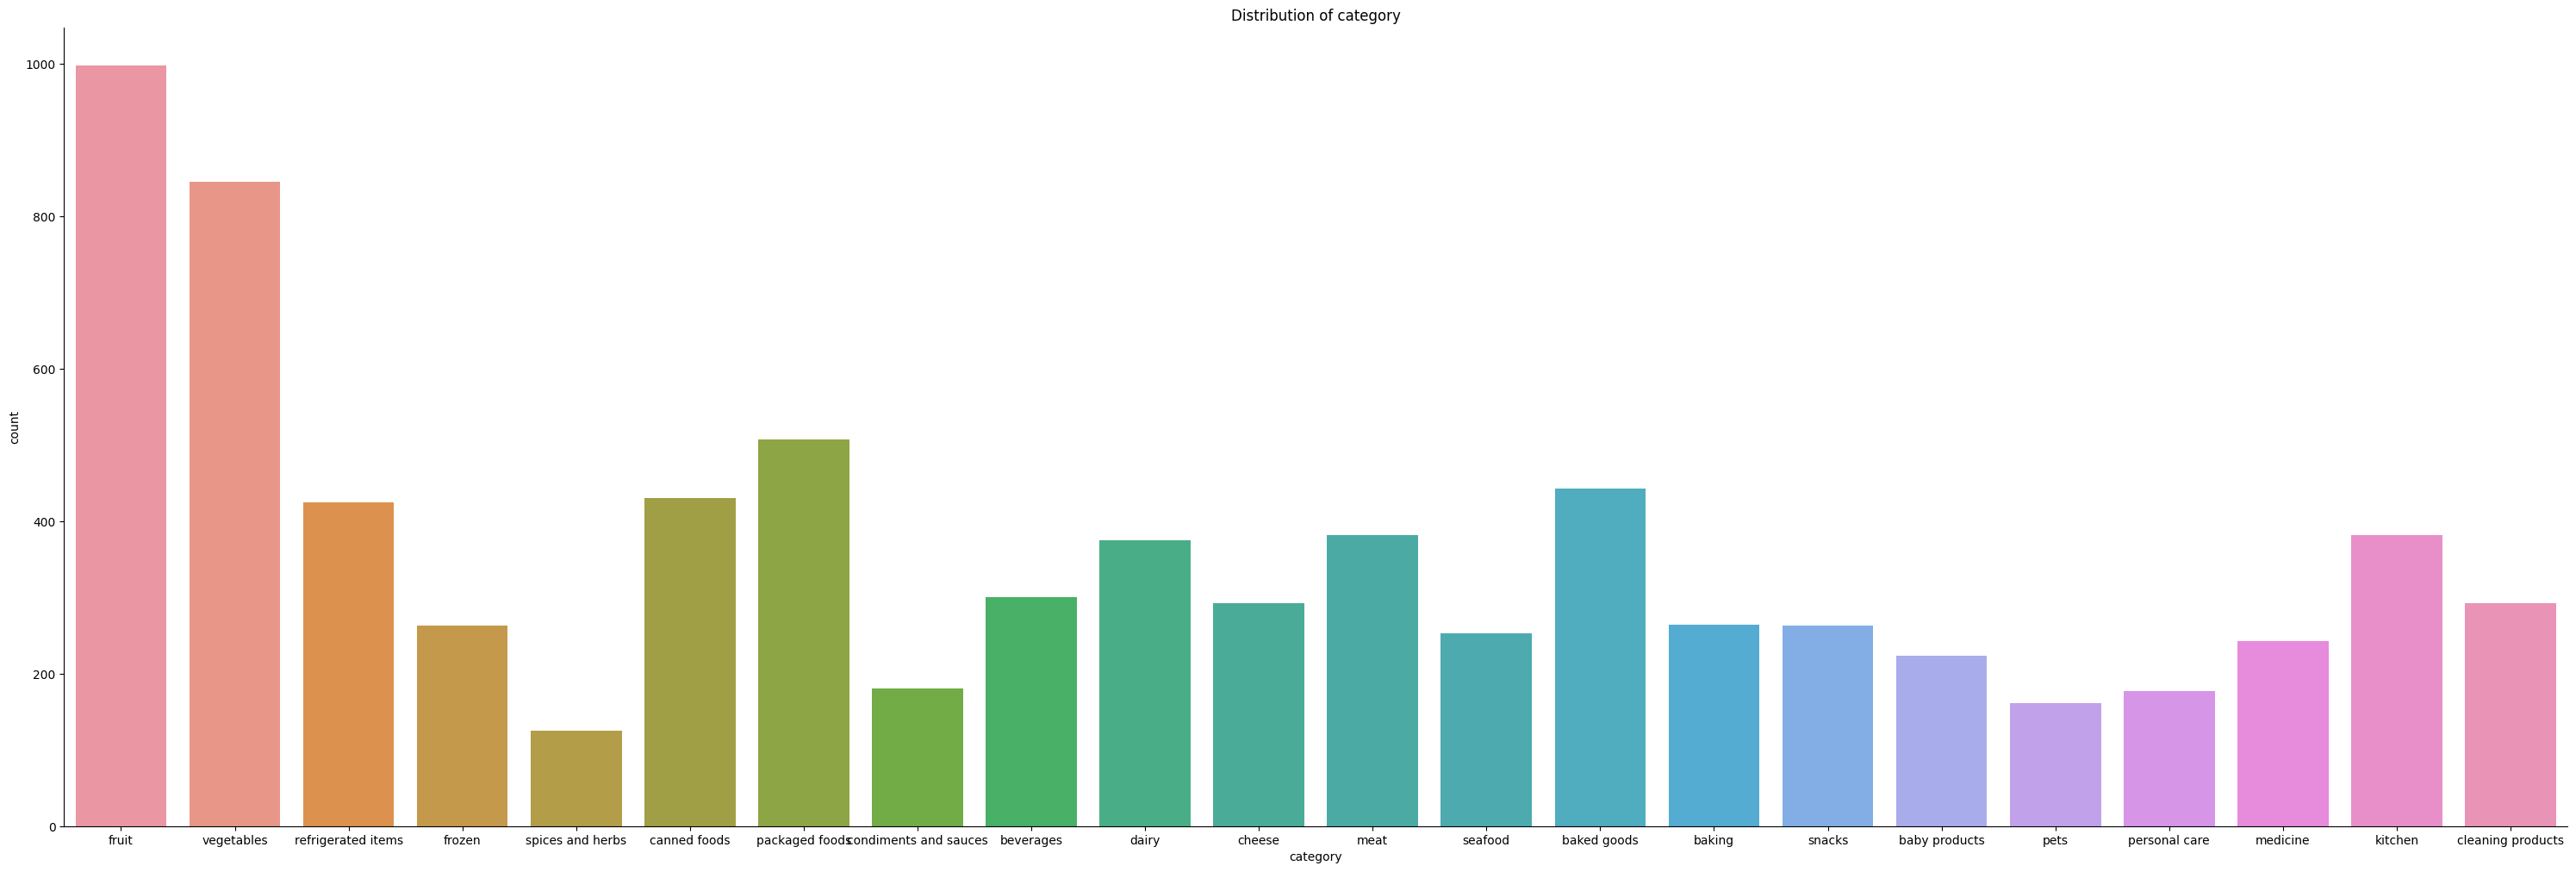

In [ ]:
categorical_distribution(df2, 'category')

Chart of category shows that Fruits and Vegitables are frequently demanded than other products 

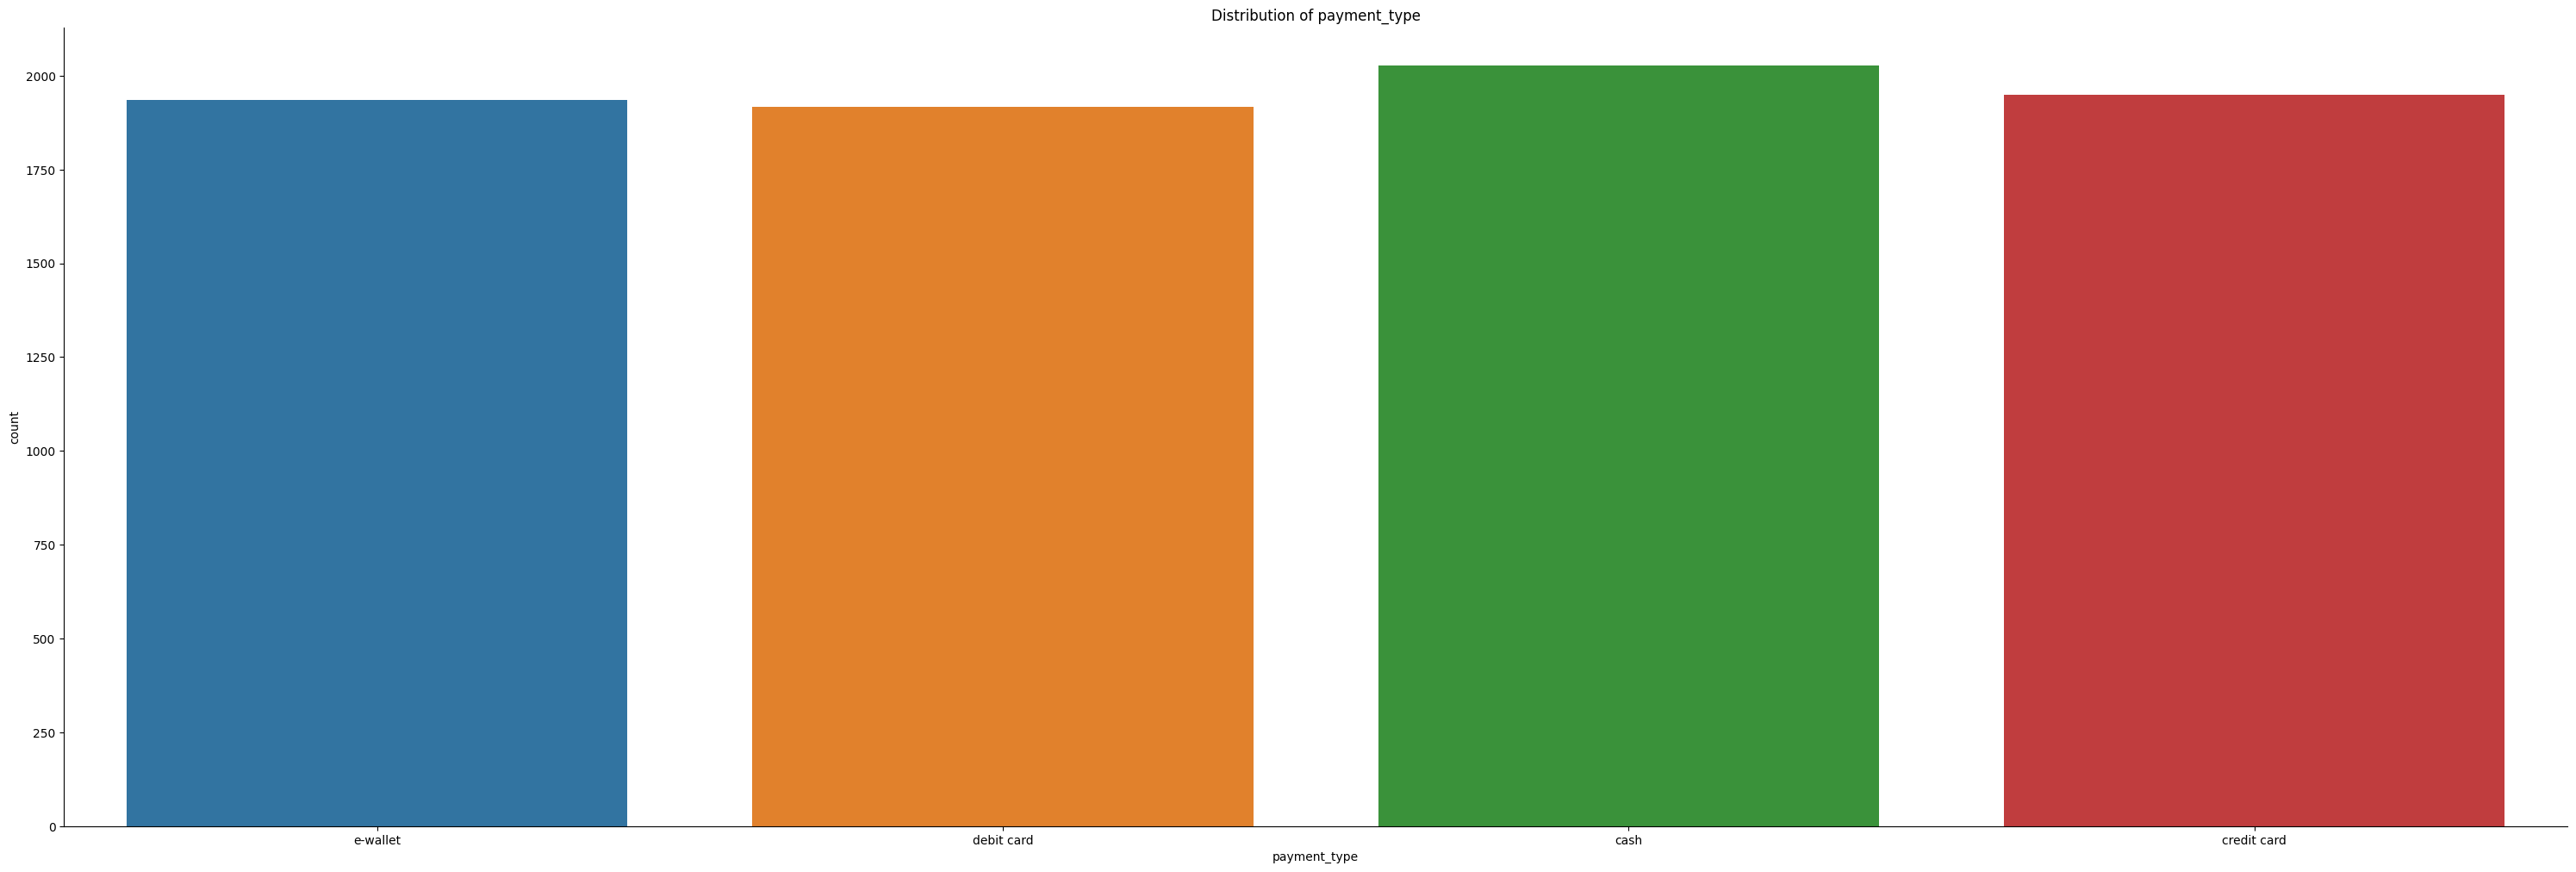

In [ ]:
categorical_distribution(df2, 'payment_type')

This Chart shows that data is almost equally distributed among the 4 payment methods but cash is largely used than ither methods for payments

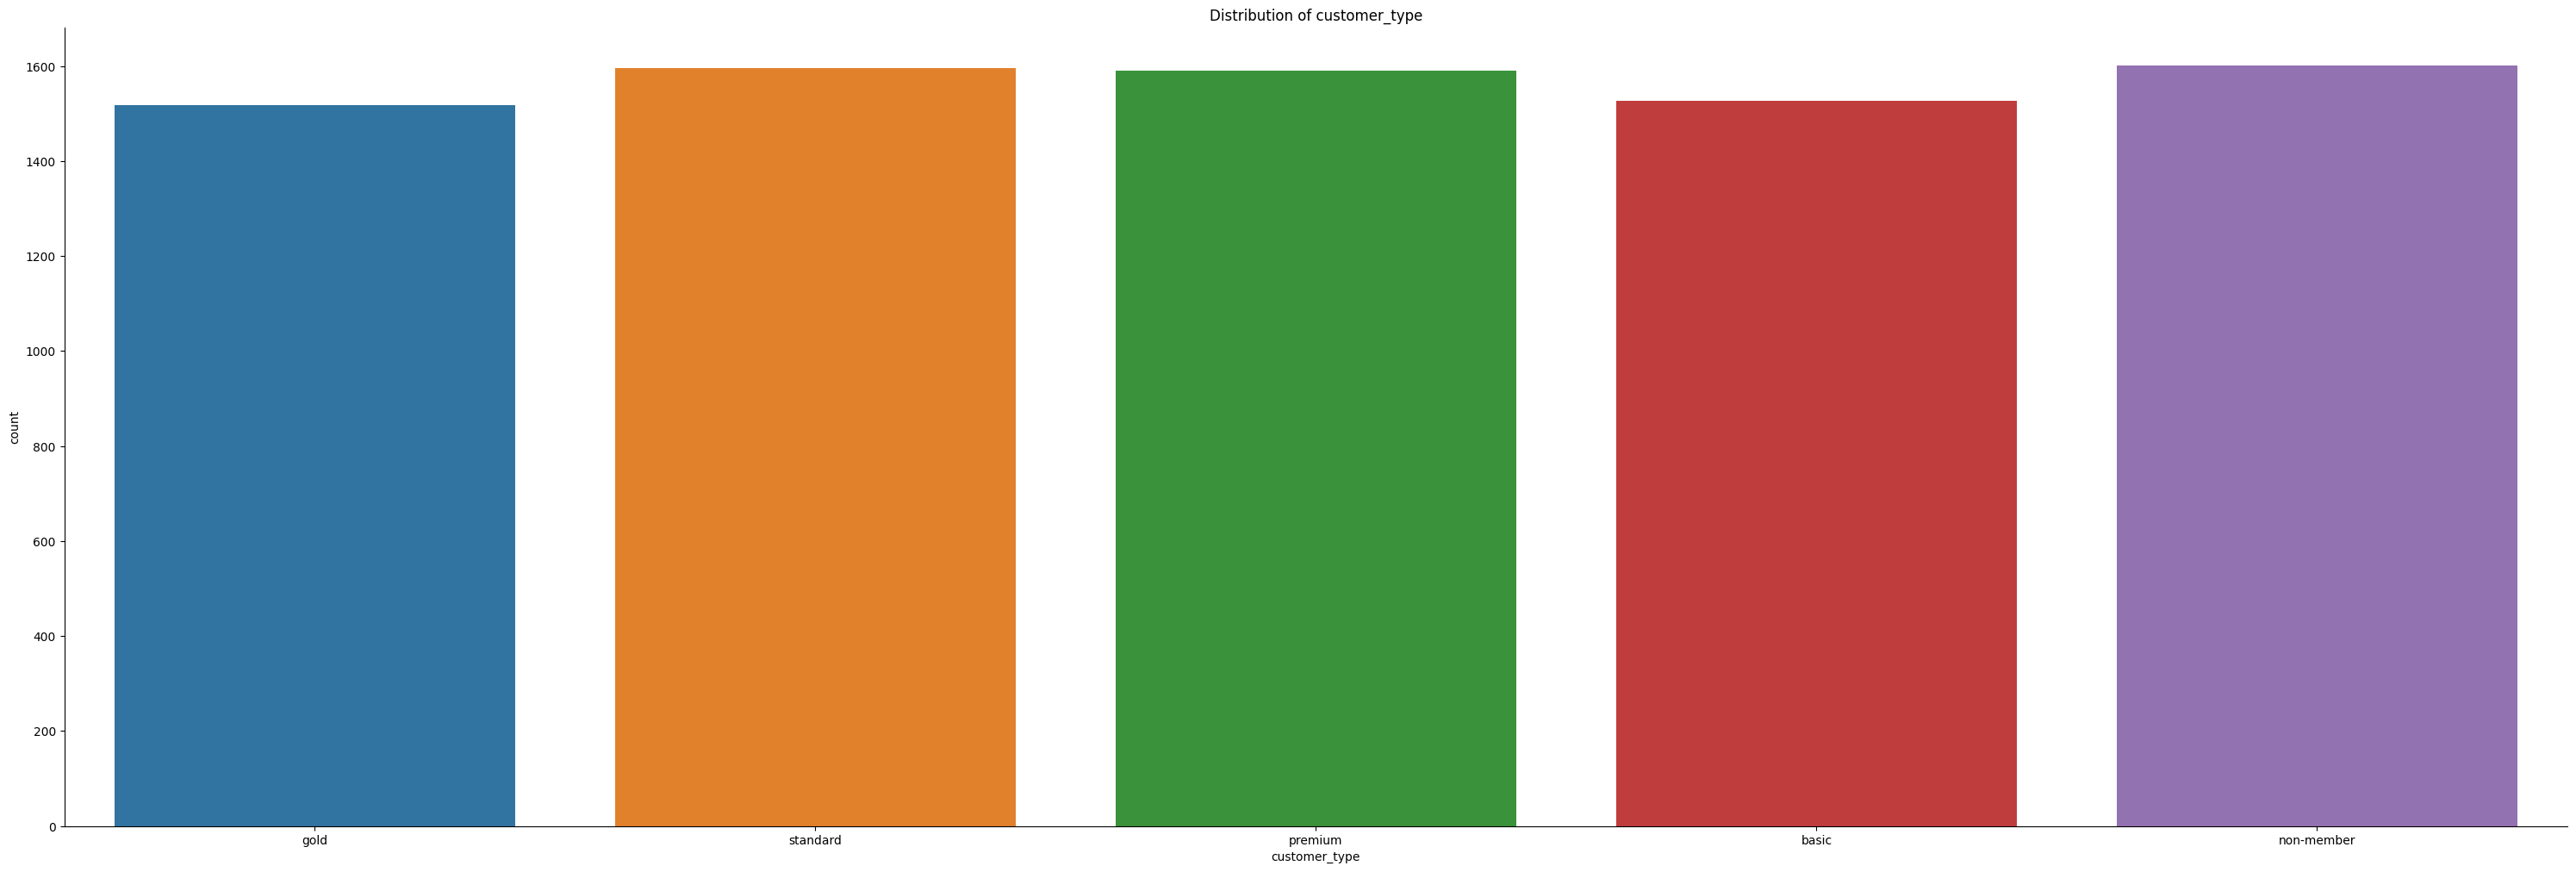

In [ ]:
categorical_distribution(df2, 'customer_type')

Nonmember customers are higher in number compared to other categories. On the other hand, members with gold membership are less in numbers

<ipython-input-96-a7f56fde7977>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


<Axes: >

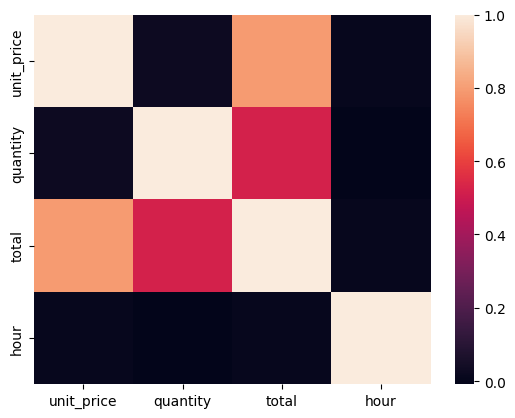

In [ ]:
corr = df2.corr()
sns.heatmap(corr)